# Project for rmrb - Part #[?]

In [1]:
import lucem_illud_2020
import os

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy 

import gensim 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm 
import seaborn as sns 

import itertools
import json

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the corpus
rmrb_dict = {}
for file in os.listdir("../data/corpus_by_year/"):
    year = int(file[:4])
    text = []
    path = "../data/corpus_by_year/" + file
    with open(path) as f:
        for line in f:
            text += line.split()
    rmrb_dict[year] = text

In [3]:
rmrb = pd.DataFrame.from_dict({"year": rmrb_dict.keys(), "tokens": rmrb_dict.values()}, orient="index").T
rmrb.head()

,year,tokens
0,2002,"[本报, 北京, 2001, 12, 31, 日讯, 知识性, 可读性, 欣赏性, 一体, ..."
1,2001,"[加大, 治本, 力度, 狠抓, 工作, 落实, 取得, 反腐败, 斗争, 成效, 尉健行,..."
2,2000,"[当今, 新年, 钟声, 敲响, 中国, 人民, 全世界, 人民, 怀着, 无比, 兴奋, ..."
3,1971,"[今年, 我国, 人民, 无产阶级, 专政, 继续, 革命, 重要, 一年, 实行, 发展,..."
4,1965,"[坚决, 破除迷信, 改进, 原有, 设计, 洛阳, 轴承厂, 严格, 科学, 精神, 指导..."


## Topic Modelling with Gensim

In [29]:
# Construct the rmrb dictionary
dictionary = gensim.corpora.Dictionary(rmrb["tokens"])

In [30]:
# Create a list of tuples that contains each token and its count
corpus = [dictionary.doc2bow(text) for text in rmrb["tokens"]]

In [72]:
# Serialize the corpus
gensim.corpora.MmCorpus.serialize("../models/LDA/rmrb.mm", corpus)
rmrb_mm = gensim.corpora.MmCorpus("../models/LDA/rmrb.mm")

In [32]:
# Use the formateed corpus for topic modelling and induction
rmrb_lda = gensim.models.ldamodel.LdaModel(corpus=rmrb_mm, id2word=dictionary, num_topics=10, alpha="auto", eta="auto")

In [33]:
rmrb_lda.show_topics()

[(0,
  '0.011*"发展" + 0.009*"我们" + 0.007*"社会主义" + 0.007*"人民" + 0.007*"经济" + 0.006*"工作" + 0.006*"建设" + 0.005*"问题" + 0.005*"中国" + 0.005*"革命"'),
 (1,
  '0.009*"发展" + 0.007*"我们" + 0.007*"社会主义" + 0.006*"经济" + 0.006*"人民" + 0.005*"问题" + 0.005*"建设" + 0.005*"国家" + 0.005*"革命" + 0.005*"一个"'),
 (2,
  '0.011*"我们" + 0.009*"发展" + 0.006*"工作" + 0.006*"问题" + 0.006*"人民" + 0.005*"经济" + 0.005*"进行" + 0.005*"一个" + 0.005*"他们" + 0.004*"社会主义"'),
 (3,
  '0.010*"我们" + 0.009*"发展" + 0.007*"社会主义" + 0.006*"工作" + 0.006*"建设" + 0.006*"人民" + 0.005*"国家" + 0.005*"问题" + 0.005*"中国" + 0.005*"经济"'),
 (4,
  '0.009*"发展" + 0.008*"我们" + 0.007*"社会主义" + 0.006*"革命" + 0.005*"工作" + 0.005*"建设" + 0.005*"中国" + 0.005*"问题" + 0.005*"经济" + 0.005*"国家"'),
 (5,
  '0.011*"发展" + 0.009*"我们" + 0.008*"经济" + 0.007*"社会主义" + 0.006*"问题" + 0.006*"工作" + 0.005*"改革" + 0.005*"社会" + 0.004*"企业" + 0.004*"建设"'),
 (6,
  '0.012*"发展" + 0.010*"我们" + 0.008*"社会主义" + 0.007*"问题" + 0.006*"工作" + 0.005*"我国" + 0.005*"一个" + 0.005*"中国" + 0.005*"建设" + 0.005*"经济"'),
 (7,
  '0.012

In [34]:
# Inspect which topic the model predicts and load into DataFrame
lda_df = pd.DataFrame({
    "year": rmrb["year"], 
    "topics": [rmrb_lda[dictionary.doc2bow(l)] for l in rmrb["tokens"]]
})
lda_df.sort_values(by="year")

,year,topics
4,1965,"[(0, 0.06613135), (1, 0.09189084), (2, 0.08159..."
7,1966,"[(0, 0.05627712), (1, 0.06488277), (2, 0.05870..."
10,1967,"[(0, 0.07505589), (1, 0.05623004), (2, 0.02964..."
35,1968,"[(0, 0.12945786), (1, 0.11972912), (2, 0.03312..."
34,1969,"[(0, 0.06412676), (1, 0.12002813), (2, 0.03770..."
5,1970,"[(0, 0.20902802), (1, 0.109498), (2, 0.0435872..."
3,1971,"[(0, 0.09863645), (1, 0.13992198), (2, 0.06279..."
8,1972,"[(0, 0.055132188), (1, 0.20432246), (2, 0.0694..."
9,1973,"[(0, 0.081565164), (1, 0.18121393), (2, 0.0552..."
16,1974,"[(0, 0.029319307), (1, 0.06667078), (2, 0.0609..."


In [40]:
# Show the table that makes each topic its own column

# Dictionary that temporarily holds the probability
topicsProbDict = {i: [0] * len(lda_df) for i in range(rmrb_lda.num_topics)}

# Load them into the dictionary
for index, topicTuples in enumerate(lda_df["topics"]):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob
    
# Update the DataFrame
for topicNum in range(rmrb_lda.num_topics):
    lda_df["topic{}".format(topicNum)] = topicsProbDict[topicNum]

lda_df = lda_df.sort_values(by="year")

In [41]:
# Visualize the topics in the corpus
ldaDFV = lda_df[["topic%d" % x for x in range(rmrb_lda.num_topics)]]
ldaDFVisN = lda_df[["year"]]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
4,0.066131,0.091891,0.081590,0.000000,0.033810,0.000000,0.090825,0.515646,0.082312,0.020906
7,0.056277,0.064883,0.058709,0.000000,0.036770,0.000000,0.040271,0.721601,0.017391,0.000000
10,0.075056,0.056230,0.029646,0.000000,0.049721,0.000000,0.026648,0.751494,0.010191,0.000000
35,0.129458,0.119729,0.033124,0.000000,0.045621,0.000000,0.019576,0.644784,0.000000,0.000000
34,0.064127,0.120028,0.037708,0.000000,0.014804,0.000000,0.032710,0.713046,0.015080,0.000000
5,0.209028,0.109498,0.043587,0.000000,0.012666,0.000000,0.036749,0.563608,0.018585,0.000000
3,0.098636,0.139922,0.062792,0.000000,0.011459,0.000000,0.025993,0.635400,0.017181,0.000000
8,0.055132,0.204322,0.069430,0.000000,0.011890,0.000000,0.028829,0.574993,0.041691,0.000000
9,0.081565,0.181214,0.055261,0.000000,0.013549,0.000000,0.077084,0.545864,0.023358,0.010381
16,0.029319,0.066671,0.060930,0.000000,0.000000,0.000000,0.016607,0.806743,0.000000,0.000000


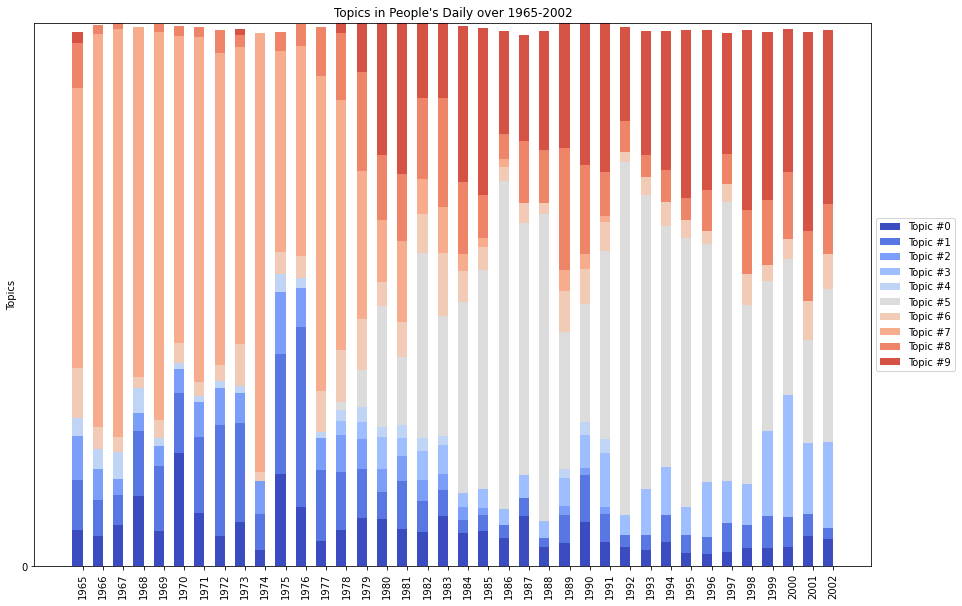

In [67]:
# Visualization as a stacked bar chart
N = 38
ind = np.arange(N)  # The x-axis locations for the novels
K = rmrb_lda.num_topics  # N documents, K topics
width = 0.5  # The width of the bars
plots = []
height_cumulative = np.zeros(N)

plt.figure(figsize=(15, 10))

for k in range(K):
    color = plt.cm.coolwarm(k / K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)

plt.ylim((0, 1)) # Proporations sum to one, so the height of the stacked bars is one
plt.ylabel("Topics")

plt.title("Topics in People's Daily over 1965-2002")
plt.xticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="vertical")
plt.yticks(np.arange(0, 1, 10))
topic_labels = ["Topic #{}".format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc="center left", frameon=True, bbox_to_anchor=(1, 0.5))

path = f"../pictures/lda_barplot.png"
plt.savefig(path, format="png")

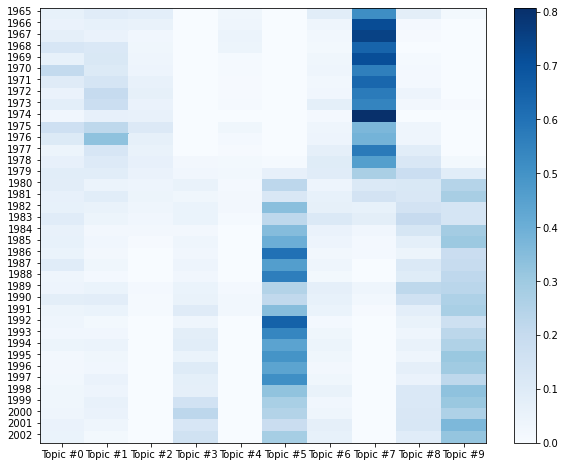

In [70]:
# Visualize as a heatmap
plt.figure(figsize=(10, 8))
plt.pcolor(ldaDFVis, norm=None, cmap="Blues")
plt.yticks(np.arange(ldaDFVis.shape[0]) + 0.5, ldaDFVisNames)
plt.xticks(np.arange(rmrb_lda.num_topics) + 0.5, topic_labels)

# Flip the y-axis so the texts are in the order we anticipate
plt.gca().invert_yaxis()

# Rotate the ticks on the x-axis
plt.xticks()
plt.yticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="horizontal")
plt.colorbar(cmap="Blues")

path = f"../pictures/lda_heatmap.png"
plt.savefig(path, format="png")